### *Assignment 3*: Sequential Recommendations
---

In [23]:
from sequential_recommendation import SequentialRecommendation
from group_recommendation import GroupRecommendation
from user_recommendation import UserRecommendation
from dataset import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ratings_df = pd.read_csv(Dataset.get_dataset_path() + 'ratings.csv')
ds = Dataset(ratings_df)

group_recommendation = GroupRecommendation(UserRecommendation(ds))

sequential_recommendation = SequentialRecommendation(group_recommendation)

userGroup = set([1, 50, 600, 44])


Motivated by the sequential methods we discussed in class, the goal of the third
assignment is to design and implement a new method for producing sequential group
recommendations.

Also, provide detailed explanations and clarifications about why the
method you propose works well for the case of sequential group recommendations.

Hint: There is no need to design a method from scratch. For the needs of this assignment,
you can suggest simple modifications of the existing approach, e.g., by proposing and
using alternatives for group aggregation that ensure good results for the group.

---

Produce a group of 3 users, and for this group, show the top-10 recommendations in 3
different sequences, i.e., the 10 movies with the highest prediction scores in 3 rounds,
using the MovieLens 100K rating dataset.

In [24]:
reccomendation_sequence = sequential_recommendation.get_sequential_recommendations_for_group(userGroup)
# i group_val user_val sat


In [25]:
sequential_recommendations, satisfactions = reccomendation_sequence

satisfactions

defaultdict(list[tuple[int, float]],
            {0: [(600, 0.8219468923774703),
              (1, 0.6647202011434414),
              (50, 0.8897638803242413),
              (44, 0.6460521844672357)],
             1: [(600, 0.8285027287036608),
              (1, 0.9631002609807228),
              (50, 0.8943010638452594),
              (44, 0.7931197396590776)],
             2: [(600, 0.8239326736237604),
              (1, 0.8606458905983625),
              (50, 0.780103077073556),
              (44, 0.8037393253786868)],
             3: [(600, 0.8673536452920304),
              (1, 0.7694043418986802),
              (50, 0.9301203948775543),
              (44, 0.7175954360607592)],
             4: [(600, 0.6729831518760617),
              (1, 0.8464407733683547),
              (50, 0.8376789629011256),
              (44, 0.8190380673358506)]})

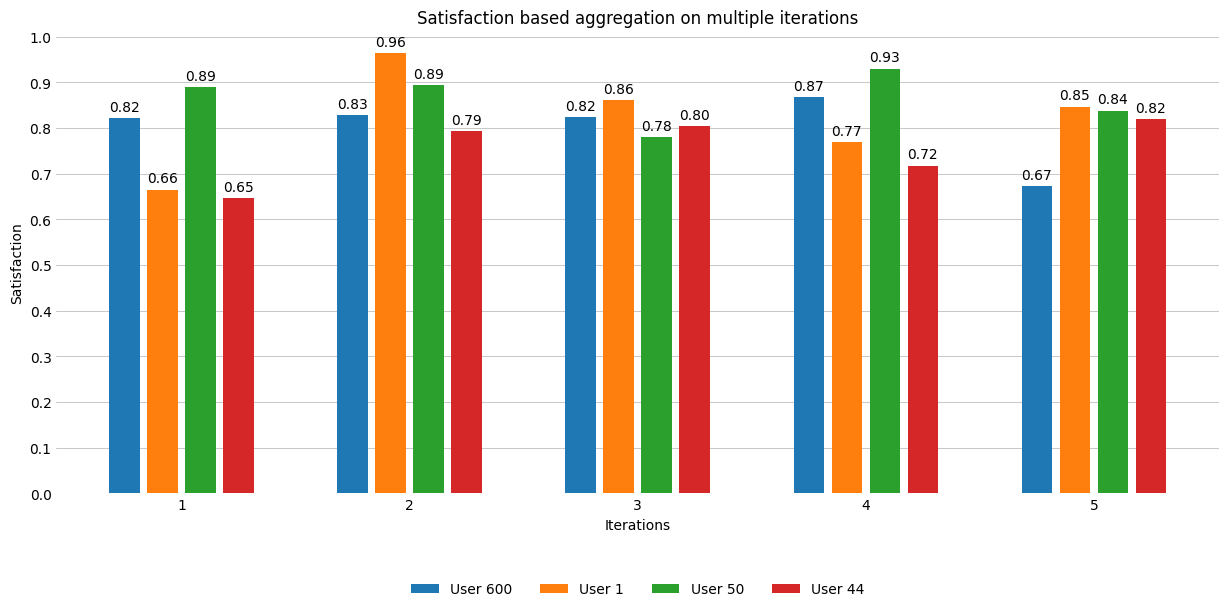

In [34]:
def prepare_data(d):
    n = len(list(d.values())[0])
    out = [list() for _ in range(n)]
    users = {}
    for k,v in d.items():
        for i,(u, x) in enumerate(v):
            out[i].append(x)
            users[i] = u
    
    return out, users, n

def multiple_bar_plot(d, width, spacing):

    out, users, n = prepare_data(d)
    m = len(d)

    if (spacing < width * n):
        print("Spacing to small")
        return

    fig, ax = plt.subplots(figsize=(15, 6))
    xs = spacing*np.arange(m)
    ax.grid(axis='y', linewidth=0.35, zorder=0)
    for i,v in enumerate(out):
        rect = ax.bar(xs - n*width/2 + width/2 + i*width, v, width*0.8, label=f'User {users[i]}', zorder=3)
        ax.bar_label(rect, padding=3, fmt='{:,.2f}')

    ax.set(frame_on=False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_ylabel('Satisfaction')
    ax.set_xlabel('Iterations')
    ax.set_title('Satisfaction based aggregation on multiple iterations')
    ax.set_xticks(np.arange(m)*spacing)
    ax.set_xticklabels(np.arange(m)+1)
    ax.set_yticks([i * 0.10 for i in range(0, 11)])

    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(out), frameon=False)

multiple_bar_plot(satisfactions, 0.25, 1.5)
plt.show()